 # Importing Required Libraries


In [ ]:
# Connecting Google Drive With Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd

# Loading and Preparing Data


In [ ]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/Sentiment Analysis of Restaurant Reviews/Restaurant_Reviews.tsv', delimiter='\t', quoting = 3)

In [ ]:
#shape (row, column)
data.shape

(1000, 2)

In [ ]:
#viewing the data
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
# Info about the Dataframe
data.info

<bound method DataFrame.info of                                                 Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]>

# Data Preprocessing

In [ ]:
# Importing the libraries for performing NLP on the Dataset
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Cleaning the reviews
corpus = []
for i in range(0, 1000):
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['Review'][i])
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[:1500]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
# Creating the Bag of Words model using CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

# Split Data - (1000,1500)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

# Model Training

In [ ]:
# Multinomial NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha = 0.2)
classifier.fit(X_train, y_train)


MultinomialNB(alpha=0.2)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

acc = round(classifier.score(X_train, y_train)*100,2)
print(str(acc)+ '%')

95.25%


In [ ]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("----Scores----")
print("Accuracy Score is: {}%".format(round(score1*100,2)))
print("Precision Score is: {}%".format(round(score2*100,2)))
print("Recall Score is: {}%".format(round(score3*100,2)))

----Scores----
Accuracy Score is: 78.5%
Precision Score is: 77.78%
Recall Score is: 81.55%


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[73 24]
 [19 84]]


Text(95.72222222222221, 0.5, 'Actual Values')

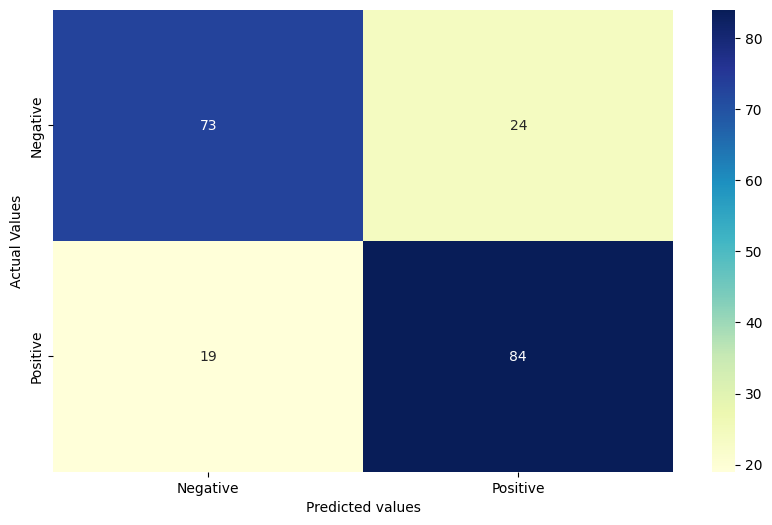

In [ ]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels= ['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')

In [ ]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB(alpha=0.8)
classifier.fit(X_train, y_train)

BernoulliNB(alpha=0.8)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

acc = round(classifier.score(X_train, y_train)*100,2)
print(str(acc)+ '%')


94.0%


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[73 24]
 [21 82]]


In [ ]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("----Scores----")
print("Accuracy is: {}%".format(round(score1*100,2)))
print("Precision is: {}%".format(round(score2*1000,2)))
print("Recall is: {}%".format(round(score3*100,2)))


----Scores----
Accuracy is: 77.5%
Precision is: 773.58%
Recall is: 79.61%


In [ ]:
# Random Forest

# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators= 625, criterion = 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=625)

In [ ]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred

acc = round(model.score(X_train, y_train)*100,2)
print(str(acc)+ '%')

99.62%


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[86 11]
 [48 55]]


In [ ]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("----Scores----")
print("Accuracy is: {}%".format(round(score1*100,2)))
print("Precision is: {}%".format(round(score2*1000,2)))
print("Recall is: {}%".format(round(score3*100,2)))

----Scores----
Accuracy is: 70.5%
Precision is: 833.33%
Recall is: 53.4%


# Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy=0.0
alpha_val=0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier= MultinomialNB(alpha=i)
  temp_classifier.fit(X_train,y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score= accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy= score
    alpha_val=1
  print("\n")
  print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100,2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 78.0%


The best accuracy is 78.0% with alpha value as 1
Accuracy score for alpha=0.2 is: 78.5%


The best accuracy is 78.5% with alpha value as 1
Accuracy score for alpha=0.3 is: 78.0%


The best accuracy is 78.5% with alpha value as 1
Accuracy score for alpha=0.4 is: 78.0%


The best accuracy is 78.5% with alpha value as 1
Accuracy score for alpha=0.5 is: 77.5%


The best accuracy is 78.5% with alpha value as 1
Accuracy score for alpha=0.6 is: 77.5%


The best accuracy is 78.5% with alpha value as 1
Accuracy score for alpha=0.7 is: 77.5%


The best accuracy is 78.5% with alpha value as 1
Accuracy score for alpha=0.8 is: 77.0%


The best accuracy is 78.5% with alpha value as 1
Accuracy score for alpha=0.9 is: 76.5%


The best accuracy is 78.5% with alpha value as 1
Accuracy score for alpha=1.0 is: 76.5%


The best accuracy is 78.5% with alpha value as 1


In [ ]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

# Predictions


In [ ]:
#cleaning the words
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
  ps= PorterStemmer()
  final_review = [ps.stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp= cv.transform([final_review])
  return classifier.predict(temp)

In [ ]:
# predicting values
sample_review = 'I love this restaurant.'

if predict_sentiment(sample_review):
  print('This is a POSITIVE review')
else:
  print('This is a NEGATIVE review')



This is a POSITIVE review
